In [2]:
import argh
from tqdm import tqdm
from typing import List, Set, Any, Dict
import numpy as np


In [9]:
def smol_count(f: str,R: int,eps = 0.5, show_flag = True):
    """
        f: The integer polynomial for which we compute f(1), f(2), ...
        R: The max value of r for which we will compute f(r)
        eps: Counts r for which f(r) <= r^eps
        show: Whether or not to show plot

        Plots the number of r <= x for which sqf(f(r)) < r^{eps} for x <= R.
    """
    P.<x> = QQ[]
    f = P(f)
    deg = f.euclidean_degree()
    outlist = []
    plot_smols = []
    smols = 0
    for r in tqdm(range(1,R+1), disable = not(show_flag)):
        if squarefree_part(f(r)) <= f(r)**eps:
            smols += 1
            plot_smols.append((r, smols))
    if len(plot_smols) == 0:
        return (0,-1)
    var('a','b')
    model(y) = (y**b)
    sol = find_fit(plot_smols, model)
    g(y) = model(b = sol[0].rhs())

    if show_flag == True:
        print("The number of smols less than", R, "is", smols)
        show(sol)
        plt = plot([])
        plt += list_plot(plot_smols, color = 'red') 
        plt += plot(g(y), y, [1,R], color = 'blue')
        plt.show()
    return (0, sol[0].rhs())

        


100%|██████████| 100000/100000 [00:02<00:00, 38530.86it/s]

The number of smols less than 100000 is 145


[b == 0.4292750769044937]

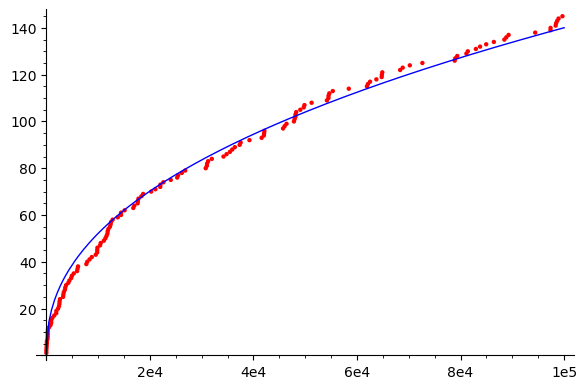

(0, 0.4292750769044937)

In [5]:
smol_count("x^2-3", 100000,0.5, True)

  0%|          | 0/5 [00:00<?, ?it/s]<ipython-input-9-1b174e1dabf2>:17: RuntimeWarning: invalid value encountered in double_scalars
  if squarefree_part(f(r)) <= f(r)**eps:
100%|██████████| 5/5 [00:27<00:00,  5.40s/it]


[a == 1.4254430972688747, b == -0.46097622153887197]

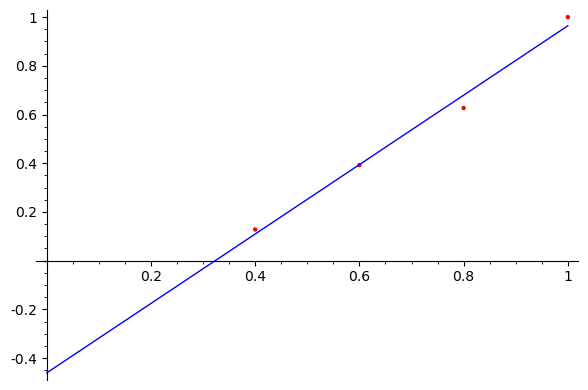

In [10]:
def eps_dep(f: str, R: int, chop = 5):
    plt_b = []
    for eps in tqdm(list(np.linspace(1/chop,1,chop))):
        exp = smol_count(f,R, eps,False)[1]
        if exp != -1:
            plt_b.append((eps,exp))
    plt = plot([])
    plt += list_plot(plt_b, color = 'red')
    var('a','b')
    model(x) = a*x+b
    sol = find_fit(plt_b, model)
    show(sol)
    g(x) = model(a=sol[0].rhs(), b=sol[1].rhs())
    plt += plot(g(x), x, [0,1], color = 'blue')
    plt.show()
    
eps_dep("x^3-3", 100000)

In [9]:
def sqf_dist(f, R, eps = 1/2):
    """
        f: The integer polynomial for which we compute f(1), f(2), ...
        R: The max value of r for which we will compute f(r)
        eps: Plot histogram with bins of width R^{1-eps}
    """

    R = int(R)
    f = "x^2-108"
    P.<x> = QQ[]
    f = P(f)
    outlist = []
    for r in tqdm(range(1,R+1)):
        if f(r) != 0:
            outlist.append(squarefree_part(f(r))/f(r))
        else:
            outlist.append(0)
    h = histogram(outlist, bins = floor(R**(eps)), weights = [1/R]*R)
    h.show()

    


100%|██████████| 100000/100000 [00:01<00:00, 54347.14it/s]


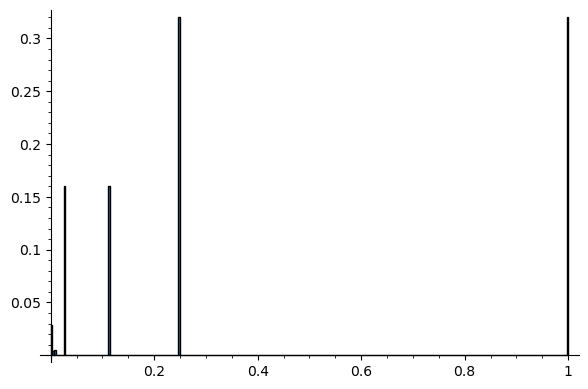

In [11]:
sqf_dist("x", 100000)